In [1]:
import pandas as pd

board_data = pd.read_csv('distribution_board_data/archive/distribution_bds.csv')
board_data.head()

,time,3rd floor lighting and plugs,4th floor lighting and plugs,"4th floor mechanical 2nd,3rd,5th lighting and plugs",6th floor lighting and plugs,7th floor lighting and plugs,"7th floor mechanical, 8th and 9th lighting and plugs",cellar power and lighting,elevator,retail,roof mechanical,sub-cellar power and lighting
0,2016-01-01 00:00:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
1,2016-01-01 00:01:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
2,2016-01-01 00:02:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
3,2016-01-01 00:03:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0
4,2016-01-01 00:04:00,2.0,3.4,12.7,8.5,7.6,18.5,22.9,2.5,32.0,-27.2,101.0


In [2]:
board_data['time'] = pd.to_datetime(board_data['time'])
board_data['year'] = board_data['time'].apply(lambda x: x.year)     
board_data['month'] = board_data['time'].apply(lambda x: x.month)
board_data['day'] = board_data['time'].apply(lambda x: x.day)
board_data['hour'] = board_data['time'].apply(lambda x: x.hour)
board_data['min'] = board_data['time'].apply(lambda x: x.minute)

board_data = board_data.loc[((board_data['hour']==0) | (board_data['hour']==12))  & (board_data['min']==0) ]  
board_data = board_data.groupby(['month', 'day', 'hour', 'min']).mean()
board_data = board_data.reset_index()
board_data = pd.merge(board_data.loc[board_data['hour']==12], 
    board_data.loc[board_data['hour']==0], how='inner', on=['year','month', 'day'])

board_data.index = pd.to_datetime(board_data[['year', 'month', 'day']])

In [3]:
board_data.head()

,month,day,hour_x,min_x,3rd floor lighting and plugs_x,4th floor lighting and plugs_x,"4th floor mechanical 2nd,3rd,5th lighting and plugs_x",6th floor lighting and plugs_x,7th floor lighting and plugs_x,"7th floor mechanical, 8th and 9th lighting and plugs_x",...,4th floor lighting and plugs_y,"4th floor mechanical 2nd,3rd,5th lighting and plugs_y",6th floor lighting and plugs_y,7th floor lighting and plugs_y,"7th floor mechanical, 8th and 9th lighting and plugs_y",cellar power and lighting_y,elevator_y,retail_y,roof mechanical_y,sub-cellar power and lighting_y
2016-01-01,1,1,12,0,2.0,3.40,12.70,8.50,7.60,18.50,...,3.4,12.70,8.50,7.60,18.50,22.90,2.5,32.00,-27.20,101.00
2016-01-02,1,2,12,0,1.8,3.30,12.80,8.25,8.85,17.95,...,3.7,8.70,8.00,7.40,10.70,19.90,2.5,13.60,-25.80,102.85
2016-01-03,1,3,12,0,1.8,3.20,14.30,8.30,7.70,16.95,...,3.5,8.20,8.15,8.50,10.10,28.20,2.5,13.30,-25.65,102.90
2016-01-04,1,4,12,0,1.9,7.90,25.25,8.90,8.55,36.40,...,3.3,8.25,8.10,8.25,11.10,26.35,2.5,13.30,-24.55,104.30
2016-01-05,1,5,12,0,2.3,3.35,22.30,8.25,8.80,37.20,...,3.2,12.40,8.05,8.10,22.35,38.50,1.8,14.15,184.30,102.35


# Plot the 12 am vs. 12 pm energy usage for each day, for each distribution board

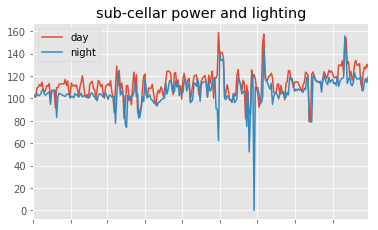

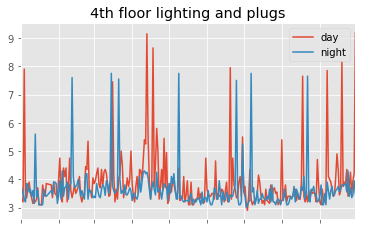

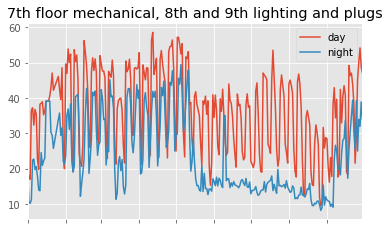

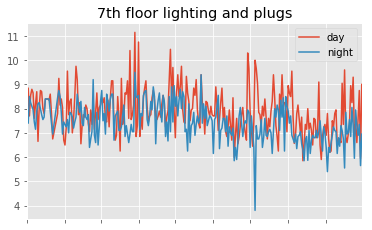

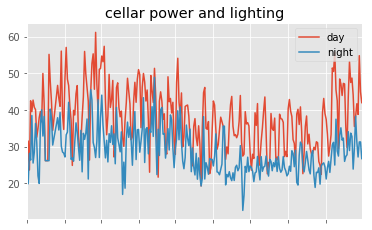

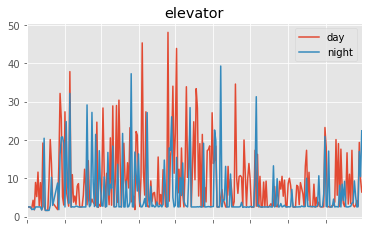

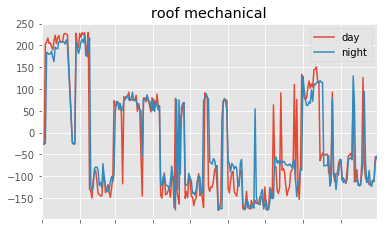

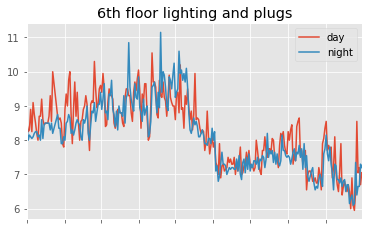

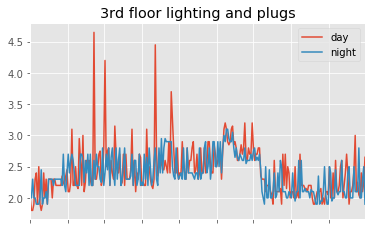

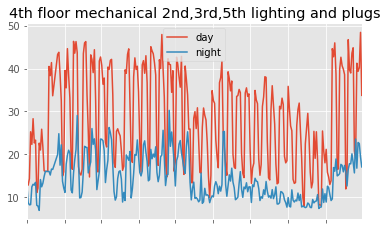

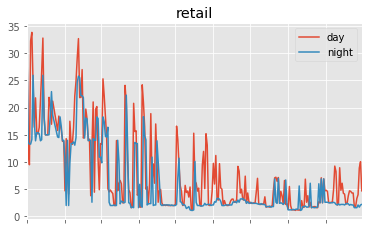

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')


boards = {'3rd floor lighting and plugs',
       '4th floor lighting and plugs',
       '4th floor mechanical 2nd,3rd,5th lighting and plugs',
       '6th floor lighting and plugs', '7th floor lighting and plugs',
       '7th floor mechanical, 8th and 9th lighting and plugs',
       'cellar power and lighting', 'elevator', 'retail',
       'roof mechanical', 'sub-cellar power and lighting'
         }

all_diffs = []

plt.figure()
for board in boards:
    night, day = board_data.loc[:'2016-9-30', '{}_y'.format(board) ], board_data.loc[ :'2016-9-30', '{}_x'.format(board) ] 
    plt.title(board)
#     plt.plot(day)
#     plt.plot(night)
    day.plot(label='day')
    night.plot(label='night')
#     plt.ylabel('Energy')
    lgd = plt.legend()
    plt.tick_params(labelbottom='off') 
    plt.tick_params(labelleft='on') 
    
    plt.savefig('powerpoint_pdfs/night_day/all_dist_boards/{}.pdf'.format(board) , format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    
    all_diffs.append( [board, abs((day-night)).mean()] )
    

In [4]:
night.head()

NameError: name 'night' is not defined

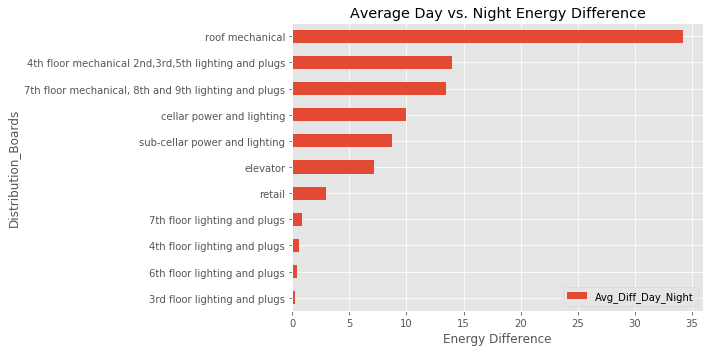

In [18]:
plt.figure()
df = pd.DataFrame(all_diffs).sort_values(1, ascending=True)
df.columns = ['Distribution_Boards', 'Avg_Diff_Day_Night']
df = df.set_index('Distribution_Boards')
df.plot(kind='barh', figsize=(10, 5))
plt.title('Average Day vs. Night Energy Difference')
plt.xlabel('Energy Difference')
plt.tight_layout()
plt.legend(loc=4)
plt.savefig('powerpoint_pdfs/night_day/compare.pdf', format='pdf', )
# plt.show()

From the graph above, we see that in general, energy usage is pretty steady for the lighting and plugs across night and day. This has a lot of potential for energy savings!!!